## Experimenting with text categorization

### Step 1: Download and review the 20 Newsgroups corpus

In [1]:
!pip install scikit-learn==0.22.2.post1
# download the 20 newsgroups corpus
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Step 2: choose a subset of the categories that you think will have minimal overlap
    (fill in the blanks)

In [2]:
categories = ['talk.politics.mideast', 'rec.autos', 'misc.forsale', 'comp.sys.ibm.pc.hardware']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

### Step 3: Build a pipeline with a MultinomialNB classifier

In [3]:
# convert to a numerical vector
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

### Step 4: Apply your model to the training data, then predict labels for test data

In [4]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

### Step 5: Visualize the performance using a confusion matrix

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/mjams001/.local/lib/python3.8/site-packages/cryptography/hazmat/backends/openssl/x509.py:14: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  warnings.warn(
     |████████████████████████████████| 215 kB 42.5 MB/s eta 0:00:01
ERROR: nxviz 0.7.4 has requirement seaborn>=0.11.1, but you'll have seaborn 0.10.1 which is incompatible.
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
/usr/lib/python3/dist-packag

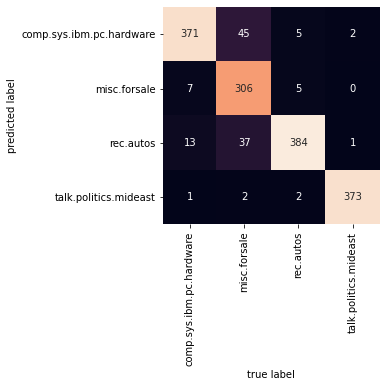

In [5]:
!pip install seaborn==0.10.1
!pip install matplotlib==3.2.1
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Step 6: Review the results. Did you manage to find any categories that were predicted with 100% accuracy?


In [9]:
from sklearn.metrics import classification_report
print(classification_report(test.target, labels))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       392
           1       0.96      0.78      0.86       390
           2       0.88      0.97      0.92       396
           3       0.99      0.99      0.99       376

    accuracy                           0.92      1554
   macro avg       0.93      0.92      0.92      1554
weighted avg       0.93      0.92      0.92      1554



- Reasonable accuracy and recall, support and f1 score for intiating deployment which can be further improved with data fitting as it shows majority of new classifications will be correct as given to users of its business application in news apps or websites.